In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [2]:
# Import data
ticker = 'NVCR'
datas = pd.read_csv('../../Datos/LQI/20m/raw_data_run1--28.csv', 
                       index_col ='Date', 
                       parse_dates = True)


#cantidad de training-test
cantidad=len(datas)
print(cantidad)
entrenamiento=int((cantidad/100)*75)
print(entrenamiento)
testing=int((cantidad/100)*25)
print(testing)
data = datas[:entrenamiento] #datos para el entrenamiento, correspondientes al 75%

8064
6048
2016


In [3]:
# Estimate historycal log returns
log_returns = np.log(1+data.pct_change())

In [4]:
log_returns.tail()

,LQI
Date,
6044,-0.009390
6045,0.009390
6046,0.009302
6047,-0.009302
6048,0.000000


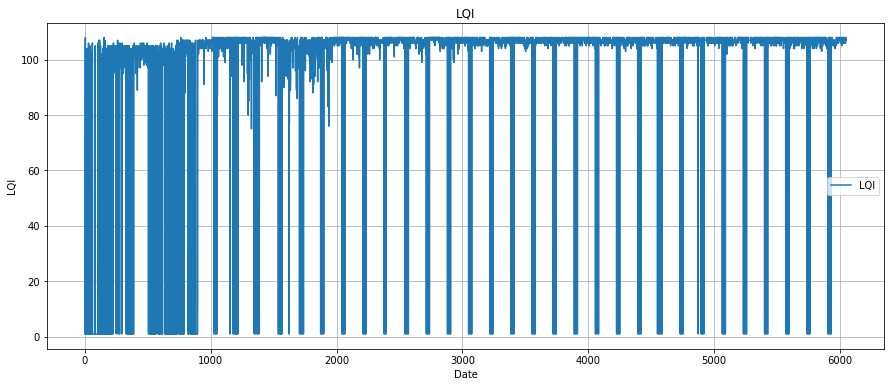

In [5]:
# Plot stock price
data.plot(figsize=(15,6))
plt.ylabel('LQI')
plt.xlabel ('Date')
plt.title('LQI')
plt.grid(True)

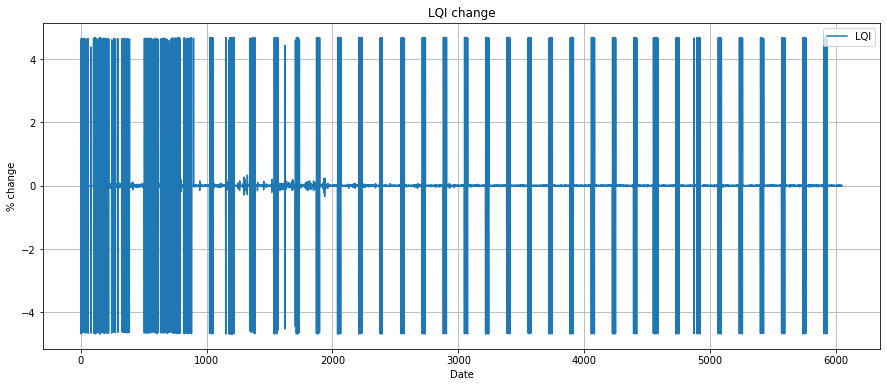

In [6]:
# Plot stock return
log_returns.plot(figsize = (15,6))
plt.ylabel('% change')
plt.xlabel('Date')
plt.title('LQI change')
plt.grid(True)

In [7]:
# Calulate log return mean
u = log_returns.mean()
u

LQI    0.000773
dtype: float64

In [8]:
# Calculate log return variance
var = log_returns.var()
var

LQI    1.791079
dtype: float64

In [9]:
# Calculate drift
# Hence we are predicting daily stock price, this number is NOT annualized. 
drift = u - (0.5*var)
drift

LQI   -0.894767
dtype: float64

In [10]:
# Calculate standard deviation 
stdev = log_returns.std()
stdev

LQI    1.338312
dtype: float64

In [11]:
type(drift)

pandas.core.series.Series

In [12]:
type(stdev)

pandas.core.series.Series

In [13]:
# Convert values to arrays
np.array(drift)

array([-0.89476691])

In [14]:
np.array(stdev)

array([1.33831212])

In [15]:
# Where 0.95 : an event has 95% chance of occuring
norm.ppf(0.95)

1.6448536269514722

In [16]:
# to randomize and generate a 10,2 dimension array. The array below contains randomly generated probilities
x = np.random.rand(10000,2) 
x

array([[0.40781223, 0.00404577],
       [0.33971414, 0.66775502],
       [0.38728132, 0.88016044],
       ...,
       [0.98956113, 0.59844581],
       [0.58383212, 0.89606874],
       [0.45591672, 0.77815802]])

In [17]:
# Obtain the distance of these probabilites from the mean
# The first number in the first row correspondes the first number of the first row above
norm.ppf(x)

array([[-0.23317636, -2.64822631],
       [-0.41324341,  0.43372249],
       [-0.28641193,  1.1757892 ],
       ...,
       [ 2.31018825,  0.24932631],
       [ 0.21170682,  1.25946475],
       [-0.11072624,  0.76598713]])

In [18]:
# Generate a random number 'z' that corresposnds to the distance between the mean and the events, 
# expressed as the number of standard deviation
# The new array uses the probailities generated by the random function and 
# converted them into distances from the mean 0, measured by the number of standard deviations. 
# This expression is the 'z' in our formula. 
z = norm.ppf(np.random.rand(10000,2))
z

array([[ 0.41965074, -1.38741464],
       [-0.35034533, -1.49279572],
       [ 1.23302839, -0.89413773],
       ...,
       [ 1.76047822, -0.32359927],
       [-1.12579395,  0.35449667],
       [-1.71182026, -0.42610872]])

In [19]:
# Calucalte stock prices
t_intervals = testing
iterations = 100000 # We want Python to run the loop ***** times

In [20]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals,iterations)))

In [21]:
daily_returns

array([[0.13481424, 0.15355911, 3.78272548, ..., 0.52568859, 0.05924536,
        0.25958808],
       [0.14935625, 0.16185034, 0.04391324, ..., 0.23922989, 0.24668617,
        0.46250142],
       [0.84309239, 0.19225545, 0.75347068, ..., 0.39119978, 0.18763174,
        1.81888624],
       ...,
       [1.08106627, 0.08316016, 0.6418341 , ..., 0.09880702, 0.34420844,
        1.30951763],
       [5.14451332, 0.22136053, 0.2556968 , ..., 0.56129283, 3.28863883,
        0.21117119],
       [0.10143131, 0.1454984 , 0.55999938, ..., 0.32136309, 6.05479647,
        0.29504096]])

In [22]:
# Determining the first datapoint in the equation, which is the latest known price return in our dataset
S0 = data.iloc[-1]
S0

LQI    107
Name: 6048, dtype: int64

In [23]:
# Creating an array, same size as the daily return filed with 0s
price_list = np.zeros_like(daily_returns)

In [24]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
# Replace zeros with the prices by creating a loop
# S0 is the first elemnt on each - here * - columns as we will have * iterations generated from the same
# starting point
price_list[0]=S0
price_list

array([[107., 107., 107., ..., 107., 107., 107.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [26]:
# After generating all the elements of the formula, fill it
for t in range (1, t_intervals):
    price_list[t] = price_list[t-1]*daily_returns[t]

In [27]:
price_list

array([[107.        , 107.        , 107.        , ..., 107.        ,
        107.        , 107.        ],
       [ 15.9811186 ,  17.31798633,   4.69871696, ...,  25.59759776,
         26.39542049,  49.48765192],
       [ 13.47355942,   3.32947733,   3.54034545, ...,  10.01377455,
          4.95261868,  90.0124093 ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

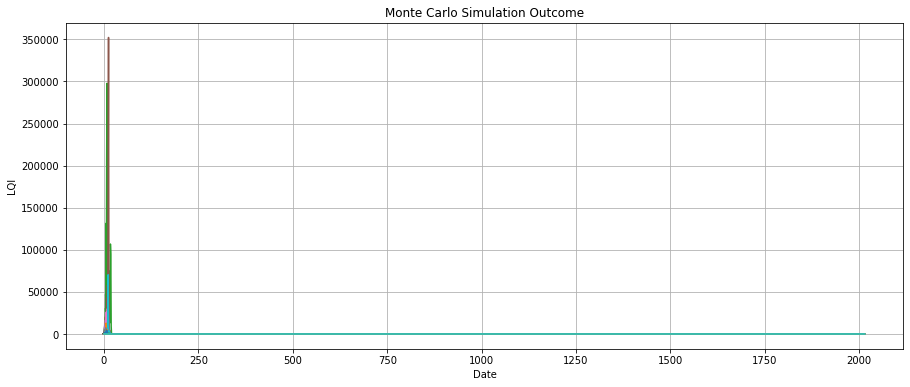

In [28]:
# Plot the last 500 out of the * simulated stock prices
plt.figure(figsize=(15,6))
plt.plot(price_list[:, :5000]);
plt.ylabel('LQI')
plt.xlabel('Date')
plt.title ('Monte Carlo Simulation Outcome')
plt.grid(True)

In [29]:
#sacar la parte de test
test = datas[entrenamiento:cantidad]
test=test.reset_index(drop="true")
test

,LQI
0,107
1,106
2,108
3,107
4,108
...,...
2011,103
2012,104
2013,100
2014,104


In [30]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

#for para comparar todas las predicciones

menor=110#el rmse mínimo a comenzar a comparar
index=0;

for i in range(0, iterations):
    prediction = rmse(test["LQI"], price_list[:, i]) 
    if prediction<menor:
        menor=prediction
        index=i
        
        
print(menor, index)

103.29044551372574 94724


In [31]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

#Hallar las diferentes métricas

prediction1 = price_list[:, index];
rmse(test["LQI"], prediction1) 


# Calculate mean squared error 
mse = mean_squared_error(test["LQI"], prediction1)
print("MSE: ")
print(mse)

# Calculate root mean squared error 
rmse = rmse(test["LQI"], prediction1)
print("\nRMSE: ")
print(rmse)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape =  mean_absolute_percentage_error(test["LQI"], prediction1)
print("\nMAPE (Porcentaje): ")
print(mape)

MSE: 
10668.916134423946

RMSE: 
103.29044551372574

MAPE (Porcentaje): 
99.31155834982609


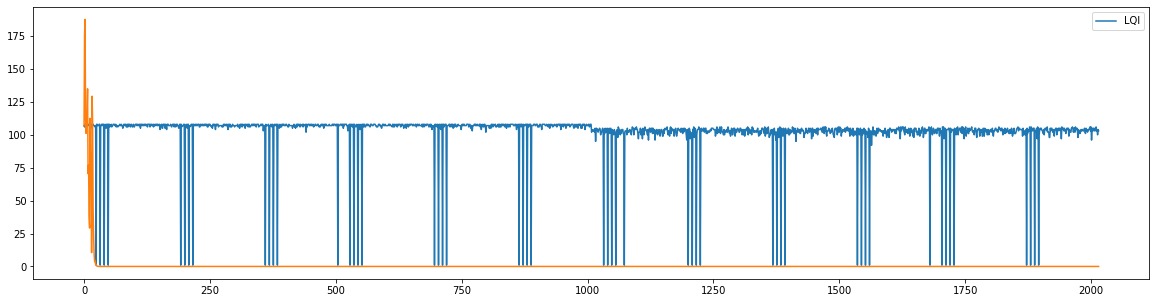

In [32]:
bp = price_list[:,index];

test.plot(figsize = (20, 5), label="true");
plt.plot(bp, label="forecast");